# Sanity test

In [2]:
import sys
sys.path.append("../../..")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from umap import UMAP
#from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

from librep.datasets.har.loaders import UCIHAR_UnbalancedView20Hz
from librep.datasets.multimodal import TransformMultiModalDataset, WindowedTransform
from librep.transforms.fft import FFT
from librep.transforms.filter import ButterWorthFilter
from librep.utils.workflow import SimpleTrainEvalWorkflow, MultiRunWorkflow
from librep.estimators import RandomForestClassifier, SVC, KNeighborsClassifier
from librep.metrics.report import ClassificationReport

2022-10-25 07:55:24.199798: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-25 07:55:24.199841: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
loader = UCIHAR_UnbalancedView20Hz("../../../data_2/views/UCI-HAR/unbalanced_20Hz_train_test_9.81_acc_filtered", 
                                   download=False) 
data_filtered = loader.load(concat_all=True, label="standard activity code")
data_filtered.data['standard activity code'] = data_filtered.data['standard activity code'].astype('int')
data_filtered

PandasMultiModalDataset: samples=3456, features=360, no. window=6, label_columns='standard activity code'

In [5]:
loader = UCIHAR_UnbalancedView20Hz("../../../data_2/views/UCI-HAR/unbalanced_20Hz_train_test_9.81_acc", 
                                   download=False) 
data_no_gravity = loader.load(concat_all=True, label="standard activity code")
data_no_gravity.data['standard activity code'] = data_no_gravity.data['standard activity code'].astype('int')
data_no_gravity

PandasMultiModalDataset: samples=3456, features=360, no. window=6, label_columns='standard activity code'

In [6]:
loader = UCIHAR_UnbalancedView20Hz("../../../data_2/views/UCI-HAR/unbalanced_20Hz_train_test_with_gravity_9.81_acc", 
                                   download=False) 
data_gravity = loader.load(concat_all=True, label="standard activity code")
data_gravity.data['standard activity code'] = data_gravity.data['standard activity code'].astype('int')
data_gravity

filter_transform = ButterWorthFilter(btype='low' ,fs=20)
windowed_filter_transform = WindowedTransform(
    filter_transform, fit_on="all", transform_on="window", select_windows=["accel-x", "accel-y", "accel-z"]
)
transformer_filter = TransformMultiModalDataset(transforms=windowed_filter_transform)

data_gravity_filtered = transformer_filter(data_gravity)

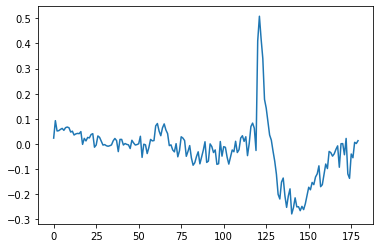

In [10]:
sample = np.array(data_no_gravity.data.iloc[:,:180])[0]
plt.plot(sample)

Amostra = 11 Atividade = sit


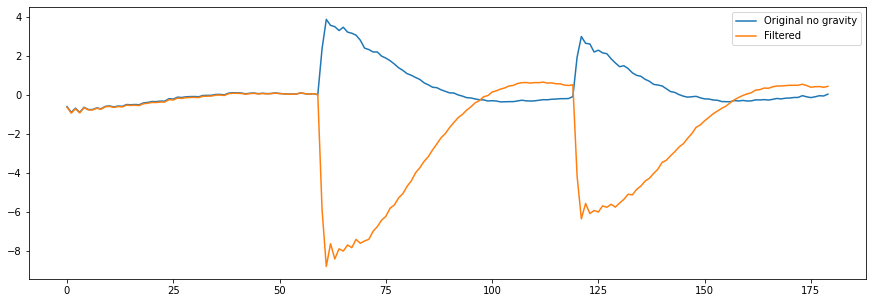

In [83]:
standard_activity_codes = {
    0: "sit",
    1: "stand",
    2: "walk",
    3: "stair up",
    4: "stair down",
    5: "run",
    6: "stair up and down"
}

amostra = 11
# sample = np.array(data_gravity.data.iloc[:,:180])[1]
# plt.plot(sample)
y = np.array(data_filtered.data['standard activity code'])[amostra]
label = standard_activity_codes[y]
print(f"Amostra = {amostra}", f"Atividade = {label}")
plt.figure(figsize=(15,5))
# sample = np.array(data_gravity.data.iloc[:,:180])[amostra]
# plt.plot(sample, label='Gravity')
sample = np.array(data_no_gravity.data.iloc[:,:180])[amostra]
plt.plot(sample, label='Original no gravity')
sample = np.array(data_filtered.data.iloc[:,:180])[amostra]
plt.plot(sample, label='Filtered')
plt.legend()

In [108]:
def plot_sample(standard_activity_codes, amostra, samples, label):
    
#     print(f"Amostra = {amostra}", f"Atividade = {label}")
    plt.figure(figsize=(15,5))    

#     plt.plot(samples[0], label='Gravity')
    plt.plot(samples[1], label='Original no gravity')
    plt.plot(samples[2], label='Filtered')
    plt.legend()
    plt.title("Amostra = {}  \n Atividade = {}".format(amostra, label))


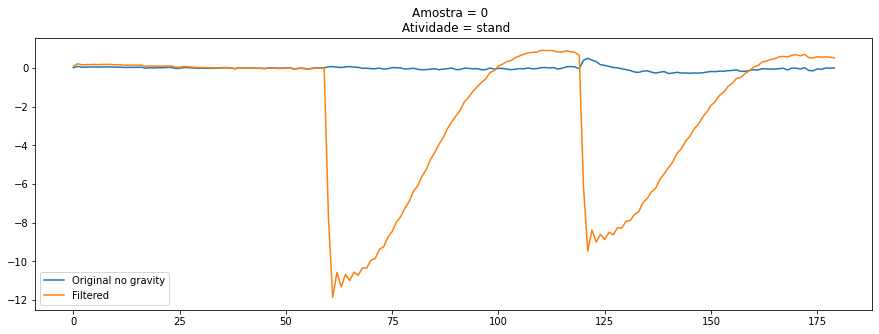

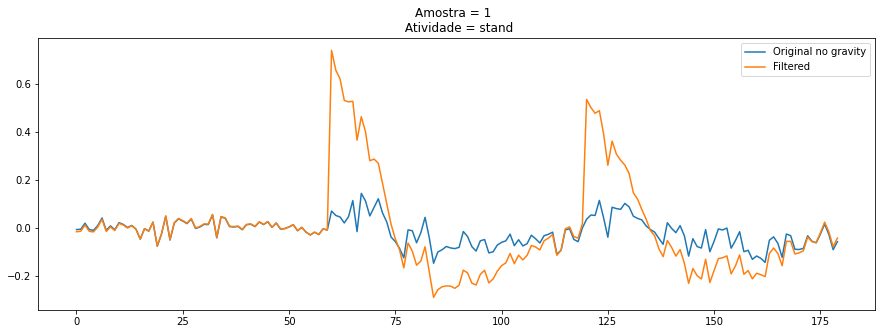

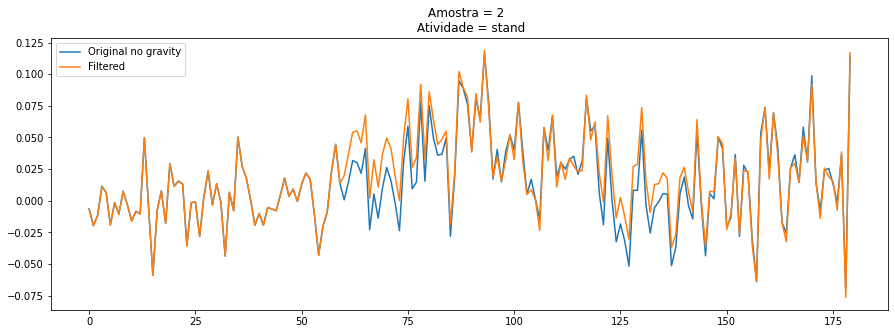

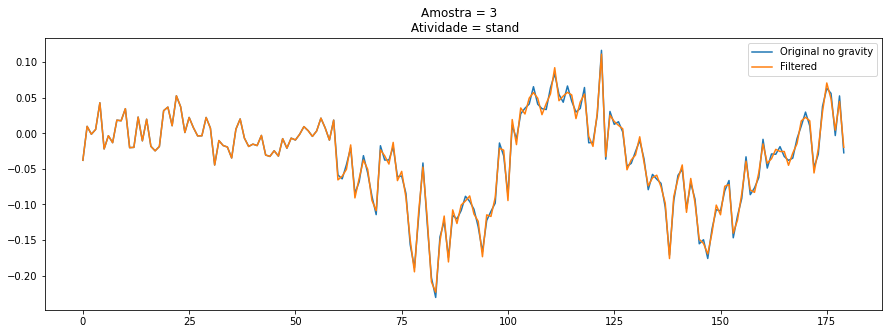

In [109]:
standard_activity_codes = {
    0: "sit",
    1: "stand",
    2: "walk",
    3: "stair up",
    4: "stair down",
    5: "run",
    6: "stair up and down"
}

amostras = [0, 1, 2, 3]
for amostra in amostras:
    samples = []
    
    sample = np.array(data_gravity.data.iloc[:,:180])[amostra]
    samples.append(sample)    
    
    sample = np.array(data_no_gravity.data.iloc[:,:180])[amostra]
    samples.append(sample)
    
    sample = np.array(data_filtered.data.iloc[:,:180])[amostra]
    samples.append(sample)
    
    y = np.array(data_filtered.data['standard activity code'])[amostra]
    label = standard_activity_codes[y]
    
    plot_sample(standard_activity_codes, amostra, samples, label)
    

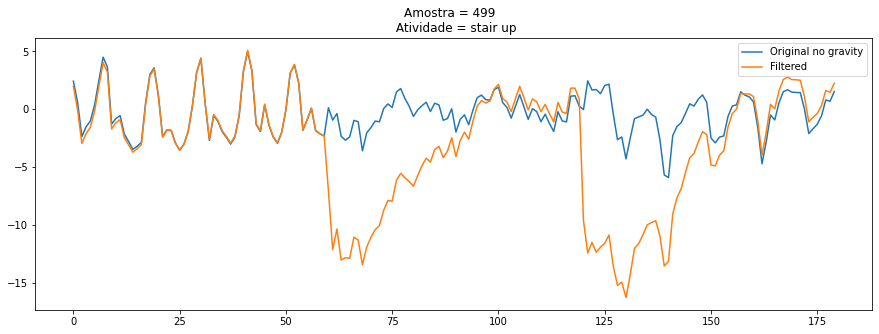

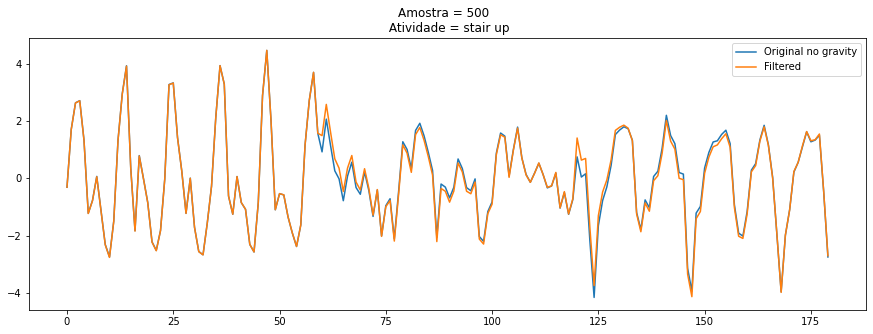

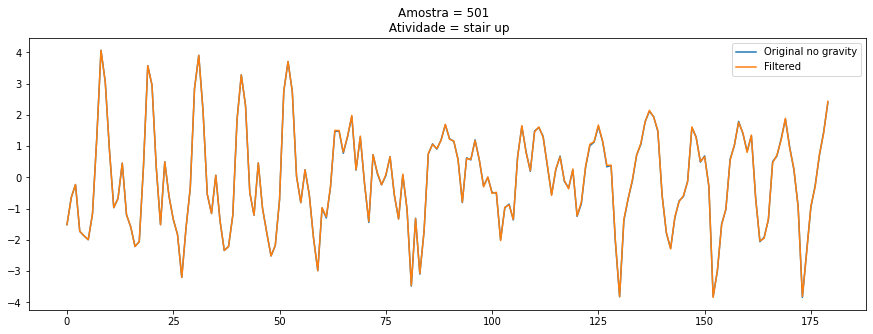

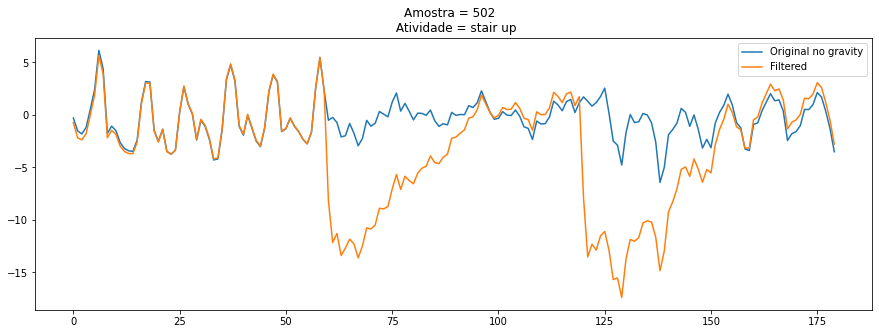

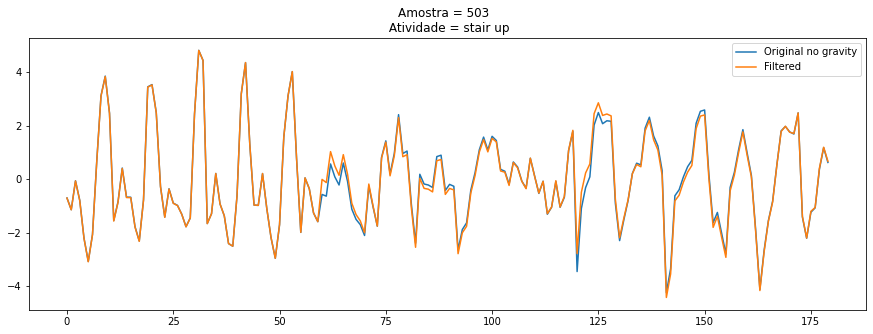

In [110]:
amostras = [499, 500, 501, 502, 503]
for amostra in amostras:
    samples = []
    
    sample = np.array(data_gravity.data.iloc[:,:180])[amostra]
    samples.append(sample)    
    
    sample = np.array(data_no_gravity.data.iloc[:,:180])[amostra]
    samples.append(sample)
    
    sample = np.array(data_filtered.data.iloc[:,:180])[amostra]
    samples.append(sample)
    
    y = np.array(data_filtered.data['standard activity code'])[amostra]
    label = standard_activity_codes[y]
    
    plot_sample(standard_activity_codes, amostra, samples, label)

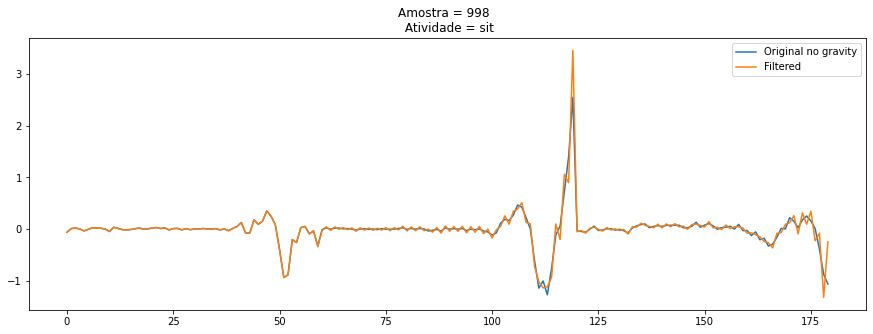

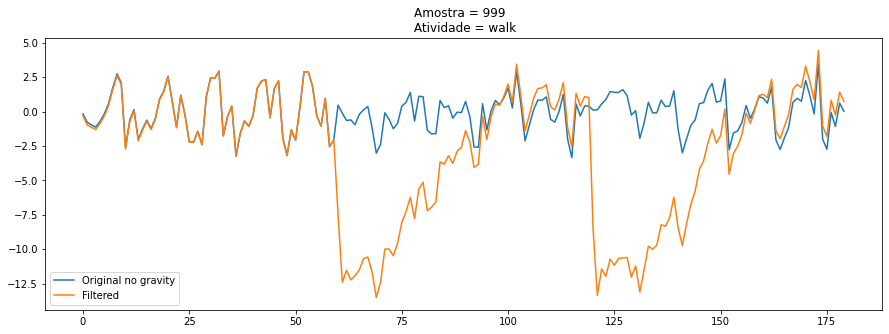

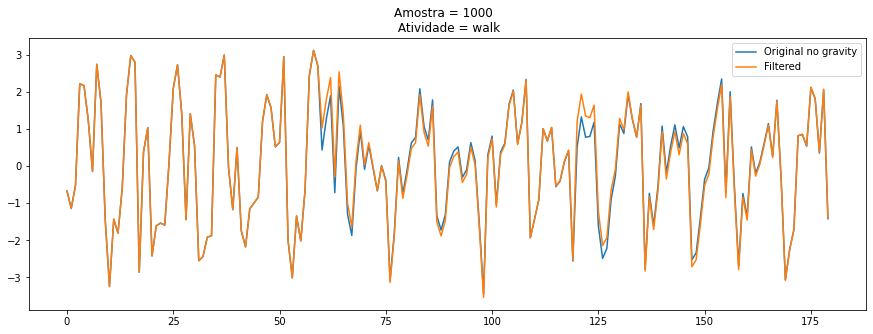

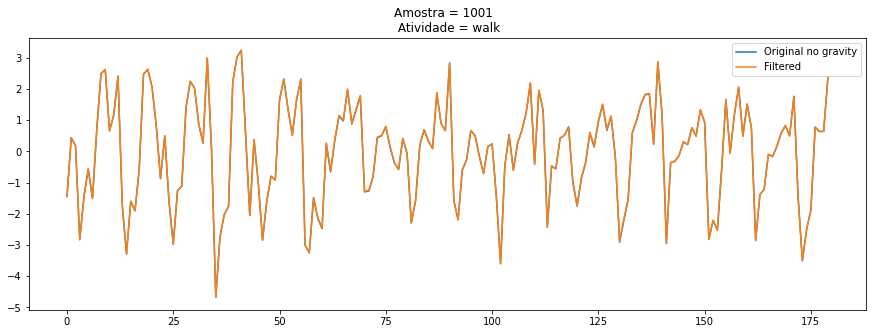

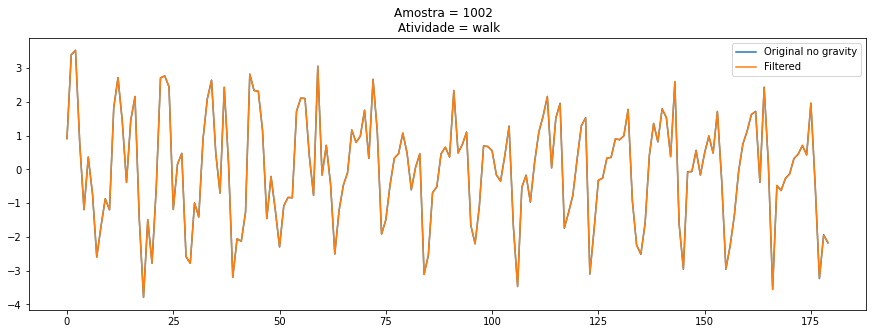

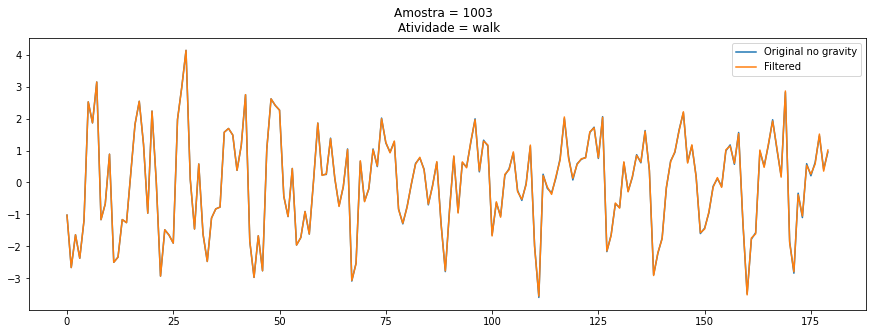

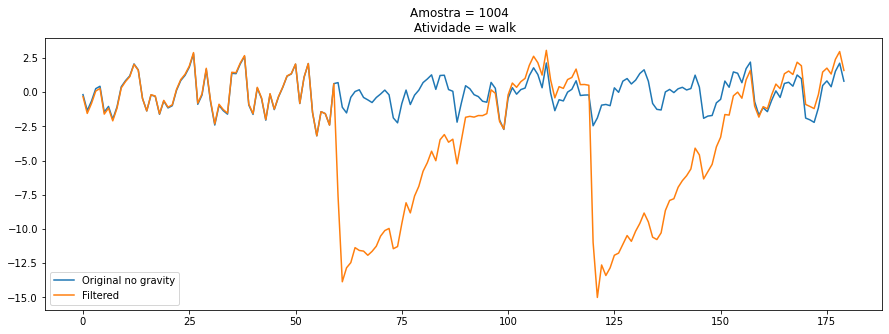

In [113]:
amostras = [998, 999, 1000, 1001, 1002, 1003, 1004]
for amostra in amostras:
    samples = []
    
    sample = np.array(data_gravity.data.iloc[:,:180])[amostra]
    samples.append(sample)    
    
    sample = np.array(data_no_gravity.data.iloc[:,:180])[amostra]
    samples.append(sample)
    
    sample = np.array(data_filtered.data.iloc[:,:180])[amostra]
    samples.append(sample)
    
    y = np.array(data_filtered.data['standard activity code'])[amostra]
    label = standard_activity_codes[y]
    
    plot_sample(standard_activity_codes, amostra, samples, label)

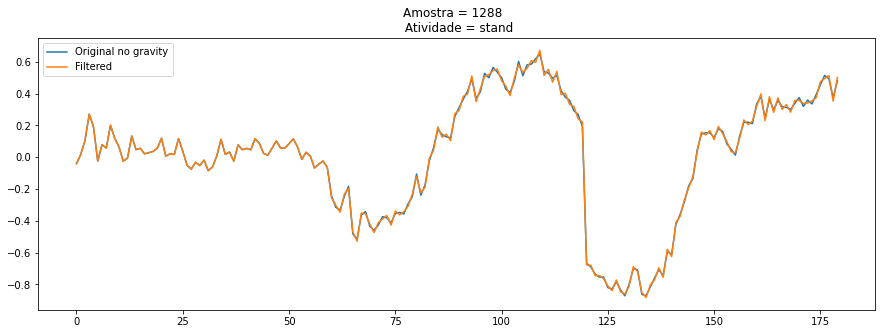

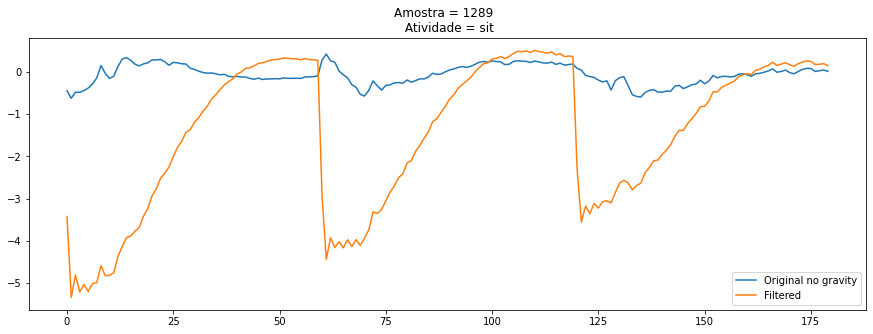

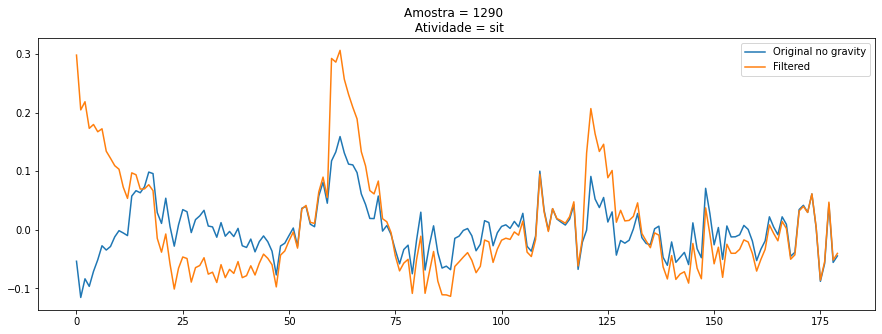

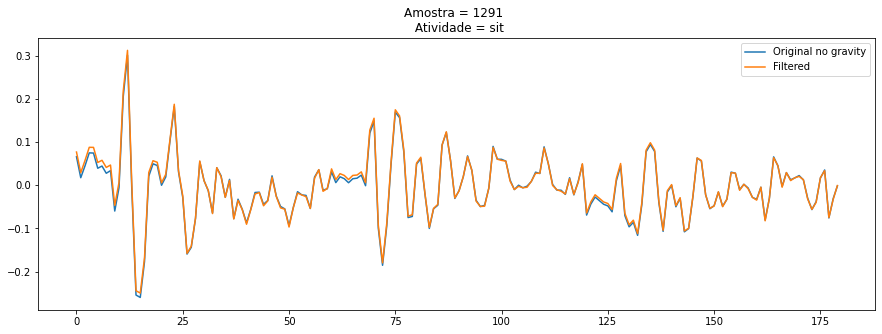

In [139]:
amostras = [1288, 1289, 1290, 1291]
for amostra in amostras:
    samples = []
    
    sample = np.array(data_gravity.data.iloc[:,:180])[amostra]
    samples.append(sample)    
    
    sample = np.array(data_no_gravity.data.iloc[:,:180])[amostra]
    samples.append(sample)
    
    sample = np.array(data_filtered.data.iloc[:,:180])[amostra]
    samples.append(sample)
    
    y = np.array(data_filtered.data['standard activity code'])[amostra]
    label = standard_activity_codes[y]
    
    plot_sample(standard_activity_codes, amostra, samples, label)

In [12]:
data_gravity.data

,accel-x-0,accel-x-1,accel-x-2,accel-x-3,accel-x-4,accel-x-5,accel-x-6,accel-x-7,accel-x-8,accel-x-9,...,gyro-z-53,gyro-z-54,gyro-z-55,gyro-z-56,gyro-z-57,gyro-z-58,gyro-z-59,activity code,user,standard activity code
0,9.982164,10.022004,9.991999,9.989105,9.99979,10.002199,9.998735,10.008979,10.015062,10.012644,...,-0.00046,-0.001029,-0.000238,0.002616,0.006758,0.009952,-0.005709,5,1,1
1,9.994811,9.995747,10.020938,9.993917,9.991015,10.010195,10.041842,9.990567,10.008804,9.992807,...,-0.005908,-0.010234,-0.011284,-0.009106,-0.001114,-0.001296,-0.002068,5,1,1
2,10.007941,9.99494,10.002836,10.025953,10.020718,9.994851,10.012237,10.003053,10.020745,10.009794,...,0.004503,0.002473,0.001083,0.007256,0.021702,0.007641,0.009008,5,1,1
3,9.970586,10.018501,10.007389,10.014299,10.051722,9.987107,10.005598,9.996123,10.027783,10.027182,...,-0.003793,-0.002657,0.001718,-0.007073,-0.012203,-0.00902,-0.00827,5,1,1
4,10.021855,10.025014,9.9787,10.032412,10.006522,10.013739,9.986978,9.990508,10.051446,10.00932,...,-0.001961,0.001915,0.002949,0.007039,-0.004036,-0.00341,-0.004388,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,7.335737,6.345408,7.850638,9.042558,10.107012,12.440331,15.946122,14.037241,10.418468,9.339211,...,-0.216337,-0.498443,-0.221196,0.040862,0.122537,0.130663,0.001037,3,24,4
3452,9.420669,12.35089,12.450553,11.826199,13.46333,9.73132,7.954961,9.07554,9.066422,8.13729,...,0.097912,0.551742,0.356796,-0.12897,-0.070716,0.436967,-0.035641,2,24,3
3453,10.229895,9.145552,7.952917,9.28752,7.821026,7.21208,7.550534,8.347369,9.251462,10.195953,...,-0.101344,-0.070548,0.196283,0.036365,-0.383925,-0.49961,-0.49678,2,24,3
3454,9.421137,8.006098,6.293598,6.960425,8.568831,8.545294,10.139792,10.737891,11.097196,13.487932,...,-0.396574,-0.585145,-0.923041,-0.865991,-0.622471,-0.7367,-0.851594,2,24,3


In [114]:
data = pd.concat([data_filtered.data, data_no_gravity.data], axis=0)
# uci2 = train_val_no_gravity.data.iloc[:,:-3]

tam = data.shape[0] // 2
dataset_name = np.array(['UCI_1' for i in range(tam)] + ['UCI_2' for i in range(tam)])
data['DataSet'] = dataset_name
tam = data.shape[0]

In [115]:
from librep.datasets.multimodal import PandasMultiModalDataset # Wrap CSVs to librep's `Dataset` interface

features = [
    "accel-x",
    "accel-y",
    "accel-z",
    "gyro-x",
    "gyro-y",
    "gyro-z"
]

# Creating the datasets

# Train
train_dataset = PandasMultiModalDataset(
    data,
    feature_prefixes=features,
    label_columns="DataSet",
    as_array=True
)

In [116]:
# Create the objects
fft_transform = FFT()
# Compose the transform
# First apply the normalizer over whole dataset and then apply FFT over each window
transformer = TransformMultiModalDataset(
    transforms=[fft_transform], new_window_name_prefix="fft."
)

In [117]:
train_fft = transformer(train_dataset)
train_gravity_fft = transformer(data_gravity_filtered)

## Plot UMAP and T-SNE

In [118]:
def plot(df, figsize: tuple = (8, 8), title: str = None, labels: dict = None):
    fig, ax = plt.subplots(figsize=figsize)
    for label, group_df in df.groupby("label"):
        label = labels[label] if labels is not None else label
        ax.scatter(group_df.x, group_df.y, label=label, s=1.5)
    ax.legend()
    plt.title(title)
    plt.show()

In [119]:
standard_activity_codes = {
    0: "sit",
    1: "stand",
    2: "walk",
    3: "stair up",
    4: "stair down",
    5: "run",
    6: "stair up and down"
}
print(standard_activity_codes)

{0: 'sit', 1: 'stand', 2: 'walk', 3: 'stair up', 4: 'stair down', 5: 'run', 6: 'stair up and down'}


In [120]:
dataset = {
    'UCI_1': 'UCI filtered', 
    'UCI_2': 'UCI without gravity'
}
print(dataset)

{'UCI_1': 'UCI filtered', 'UCI_2': 'UCI without gravity'}


### UMAP

In [121]:
# from librep.datasets.multimodal import PandasMultiModalDataset # Wrap CSVs to librep's `Dataset` interface

# lista = []
# x = data.groupby('standard activity code')
# for y in x:
#     lista.append(y)
    
# for i in range(len(lista)):
#     new_data = lista[i][1]
#     features = [
#         "accel-x",
#         "accel-y",
#         "accel-z",
#         "gyro-x",
#         "gyro-y",
#         "gyro-z"
#     ]

#     # Creating the datasets

#     # Train
#     train_dataset = PandasMultiModalDataset(
#         new_data,
#         feature_prefixes=features,
#         label_columns="DataSet",
#         as_array=True
#     )
#     new_data_fft = transformer(train_dataset)
#     model = UMAP(n_components=2, random_state=0)

#     result = pd.DataFrame(model.fit_transform(new_data_fft[:][0]), columns=["x", "y"])
#     result["label"] = new_data_fft[:][1]
#     classe = lista[i][0]
#     plot(result, title="UMAP on UCI-HAR FFT data - class: {}".format(standard_activity_codes[classe]), 
#          labels=dataset)

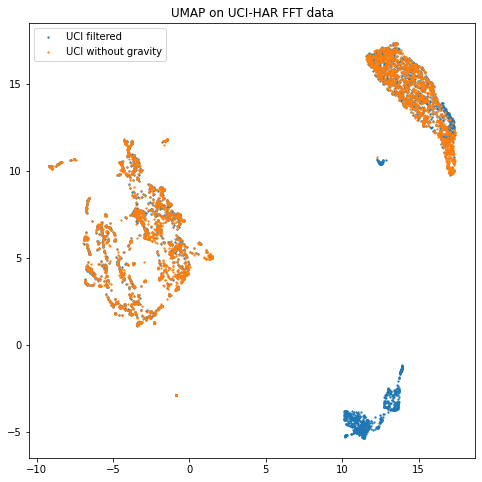

In [122]:
model = UMAP(n_components=2, random_state=0)
result = pd.DataFrame(model.fit_transform(train_fft[:][0]), columns=["x", "y"])
result["label"] = train_fft[:][1]
plot(result, title="UMAP on UCI-HAR FFT data", labels=dataset)

/tmp/ipykernel_9463/3669512637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_diff[['x','y']] = diff


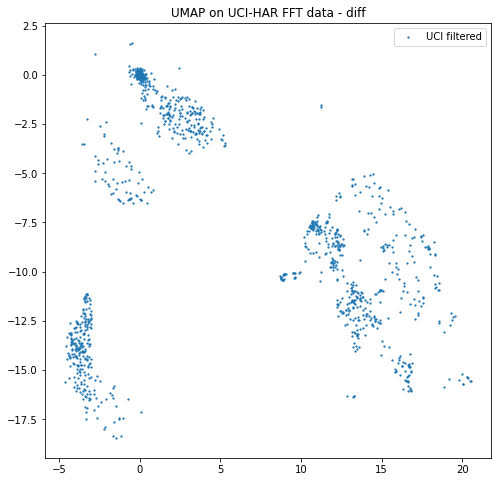

In [123]:
result_diff = result.iloc[:tam//2,:]
diff = np.array(result.iloc[:tam//2,:-1]) - np.array(result.iloc[tam//2:,:-1])
result_diff[['x','y']] = diff
plot(result_diff, title="UMAP on UCI-HAR FFT data - diff", labels=dataset)

In [124]:
cont = 0
problem_samples = []
for point in diff:
    norm = np.linalg.norm(point)
    if norm > 1:
        cont+=1
#         problem_samples.append(diff.index(point))
cont

988

### T-SNE

/home/ic-unicamp/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ic-unicamp/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


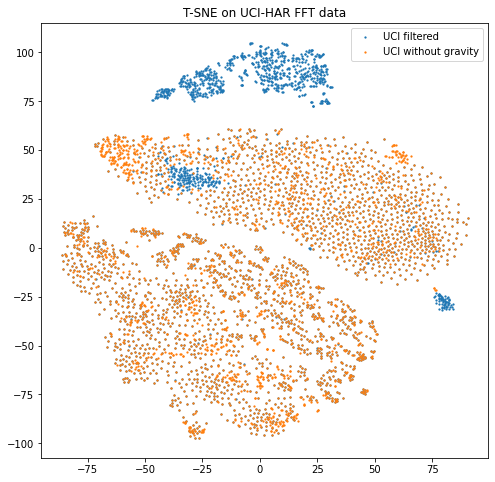

In [125]:
model = TSNE(n_components=2, random_state=0)
result = pd.DataFrame(model.fit_transform(train_fft[:][0]), columns=["x", "y"])
result["label"] = train_fft[:][1]
plot(result, title="T-SNE on UCI-HAR FFT data", labels=dataset)

/tmp/ipykernel_9463/1443738708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_diff[['x','y']] = diff


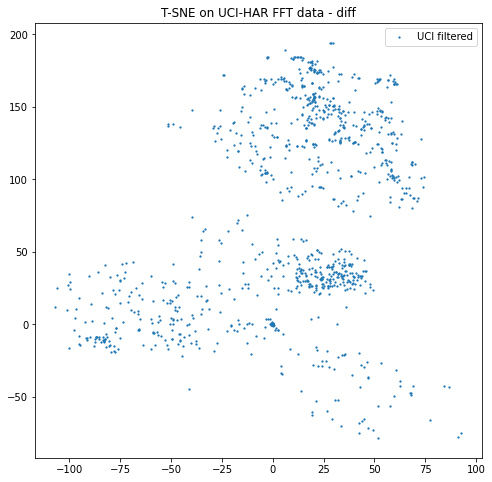

In [126]:
result_diff = result.iloc[:tam//2,:]
diff = np.array(result.iloc[:tam//2,:-1]) - np.array(result.iloc[tam//2:,:-1])
result_diff[['x','y']] = diff
plot(result_diff, title="T-SNE on UCI-HAR FFT data - diff", labels=dataset)

In [127]:
cont = 0
n = 0
problem_samples = []
ok_points = []
for point in diff:
    norm = np.linalg.norm(point)
    if norm > 1:
        cont+=1
        problem_samples.append(point)
    else:
        ok_points.append(point)
cont

1000

In [128]:
data_1 = data_filtered.data.iloc[:, :180]
data_2 = data_no_gravity.data.iloc[:, :180]

In [129]:
from sklearn.metrics import mean_squared_error 

data_1 = data_filtered.data.iloc[:, :180]
data_2 = data_no_gravity.data.iloc[:, :180]

acc = {'x': [], 'y': [], 'z': []}
axis = ['x', 'y', 'z']

data_1 = np.array(data_1)
data_1 = np.reshape(data_1, (3456, 3, 60))

data_2 = np.array(data_2)
data_2 = np.reshape(data_2, (3456, 3, 60))

erro_list = []

for sample_1, sample_2 in zip(data_1, data_2):
    for i in range(3):
        erro = mean_squared_error(sample_1[i], sample_2[i])
        axi = axis[i]
        acc[axi].append(erro)
#         erro_list.append(erro)

In [130]:
max(acc['x']), max(acc['y']), max(acc['z'])

(7.476708000496985, 68.0087052865578, 67.9939705183543)

Text(0.5, 1.0, 'Erro quadrático por amostra - Acc eixo x')

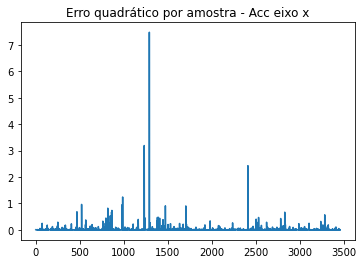

In [135]:
plt.plot(acc['x'])
plt.title('Erro quadrático por amostra - Acc eixo x')

Text(0.5, 1.0, 'Erro quadrático por amostra - Acc eixo y')

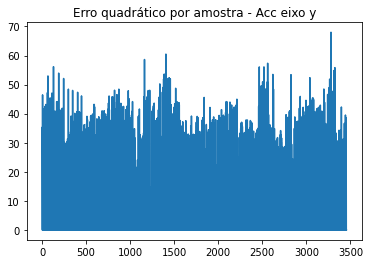

In [134]:
plt.plot(acc['y'])
plt.title('Erro quadrático por amostra - Acc eixo y')

Text(0.5, 1.0, 'Erro quadrático por amostra - Acc eixo z')

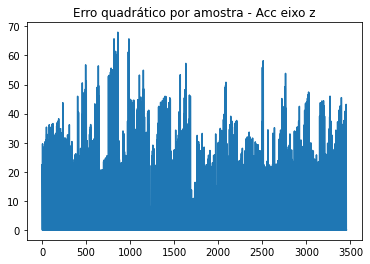

In [133]:
plt.plot(acc['z'])
plt.title('Erro quadrático por amostra - Acc eixo z')

In [68]:
percentil = np.percentile(acc['z'], 78.7, axis=0)
percentil

0.2961834579324941

In [36]:
# acc = {'x': [], 'y': [], 'z': []}
# axis = ['x', 'y', 'z']
# for sample in data_2:
#     for i in range(3):
#         axi = axis[i]
#         acc[axi].append(np.mean(sample[i]))

In [49]:
max(acc['z'])

67.9939705183543

In [90]:
from sklearn.metrics import mean_squared_error 

data_1 = data_filtered.data.iloc[:, :180]
data_2 = data_gravity_filtered.X[:, :180]

acc = {'x': [], 'y': [], 'z': []}
axis = ['x', 'y', 'z']

data_1 = np.array(data_1)
data_1 = np.reshape(data_1, (3456, 3, 60))

data_2 = np.array(data_2)
data_2 = np.reshape(data_2, (3456, 3, 60))

erro_list = []

for sample_1, sample_2 in zip(data_1, data_2):
    for i in range(3):
        erro = mean_squared_error(sample_1[i], sample_2[i])
        axi = axis[i]
        acc[axi].append(erro)

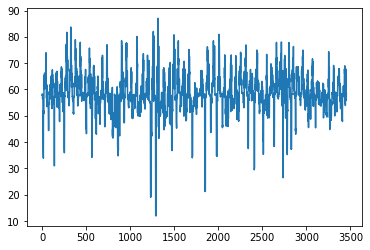

In [91]:
plt.plot(acc['x'])

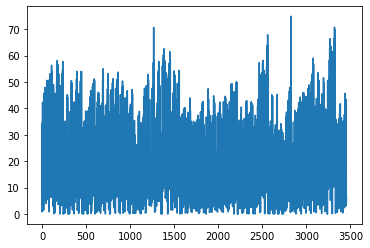

In [92]:
plt.plot(acc['y'])

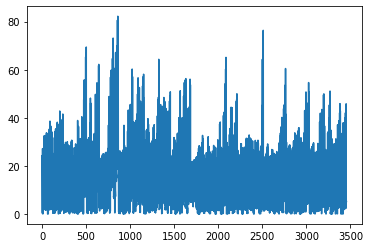

In [93]:
plt.plot(acc['z'])

In [137]:
acc['x'].index(max(acc['x']))

1289